**Prediction Quesiton**: Were Asian Americans more likely to be attacked in cities/towns with a higher amount of Covid cases due to rise in xenophobia during the Pandemic?

**Importance for client**: This research question can guide law enforcement in the future. Even though there may not be the same case of anti-asian hate, there will most likely be more xenophobia in the future. By analyzing this data, we can see if there was actually a rise during the pandemic of attacks on asian americans, and then law enforcement can protect groups in a similar scenario in the future.

**Setting Up Data:**

In [47]:
# Setting up environment:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# loading in dataset as dataframe:
df = pd.read_csv("cleaned_df.csv")
print(df.shape)

# previewing the data:
# df.head(5)
df.columns

(13794, 21)


Index(['Unnamed: 0', 'State', 'Agency', 'Source', 'Solved', 'Year', 'Month',
       'Homicide', 'Situation', 'VicAge', 'VicSex', 'VicRace', 'VicEthnic',
       'OffAge', 'OffSex', 'OffRace', 'OffEthnic', 'Weapon', 'Relationship',
       'VicCount', 'OffCount'],
      dtype='object')

In [49]:
# selecting relevant columns to use for model analysis:
df_new = df[['Year', 'Month', 'State', 'OffRace', 'OffAge', 'Situation', 'VicRace']]
# df_new.head(5)

In [50]:
# checking for NaNs:
print(df_new.isna().sum())

# dropping missing values for 'OffRace' since can not impute for categorical:
# df_new = df_new.dropna(subset=['OffRace'], axis=0)
df_new['OffRace'] = df_new["OffRace"].fillna('Unknown')


# imputing missing values for 'OffAge' with median:
df_new['OffAge'] = df_new['OffAge'].fillna(df_new['OffAge'].median())

# imputing missing values for 'VicRace' with 'Unknown':
df_new['VicRace'] = df_new['VicRace'].fillna('Unknown')

# previewing new/cleaned dataframe:
print(df_new.head())
print(df_new.isna().sum())

Year            0
Month           0
State           0
OffRace      4413
OffAge       4441
Situation       0
VicRace       210
dtype: int64
   Year    Month   State                            OffRace  OffAge  \
0  2016  January  Alaska  American Indian or Alaskan Native    21.0   
1  2016  January  Alaska                              White    15.0   
2  2016  January  Alaska                              White    15.0   
3  2016  January  Alaska                              White    34.0   
4  2016  January  Alaska  American Indian or Alaskan Native    33.0   

                          Situation                            VicRace  
0     Single victim/single offender  American Indian or Alaskan Native  
1  Multiple victims/single offender                              White  
2  Multiple victims/single offender                              White  
3  Single victim/multiple offenders  American Indian or Alaskan Native  
4     Single victim/single offender  American Indian or Alaskan Nativ

/var/folders/_2/3z4yyh_x2pvfz5gh_k92c24h0000gn/T/ipykernel_24984/3505088697.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['OffRace'] = df_new["OffRace"].fillna('Unknown')
/var/folders/_2/3z4yyh_x2pvfz5gh_k92c24h0000gn/T/ipykernel_24984/3505088697.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['OffAge'] = df_new['OffAge'].fillna(df_new['OffAge'].median())
/var/folders/_2/3z4yyh_x2pvfz5gh_k92c24h0000gn/T/ipykernel_24984/3505088697.py:13: SettingWithCopyWarning: 
A value is trying to 

**One Hot Encoding Data for Model:**

In [51]:
# separating numerical and categorical columns:

# numerical columns:
num_cols = df_new.select_dtypes(include=[np.number]).columns.tolist()
print(num_cols)

# categorical columns:
cat_cols = df_new.select_dtypes(exclude=[np.number]).columns.tolist()
# cat_cols.remove('VicRace')
print(cat_cols)

['Year', 'OffAge']
['Month', 'State', 'OffRace', 'Situation', 'VicRace']


In [52]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

y = df_new['VicRace']

X_raw = df_new.drop(columns=['VicRace'])
# # one hot encoding categorical features:
X = pd.get_dummies(X_raw, drop_first=True)

# splitting data into test/train:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Best min_sample_leaf value: 25 with Accuracy of 0.732


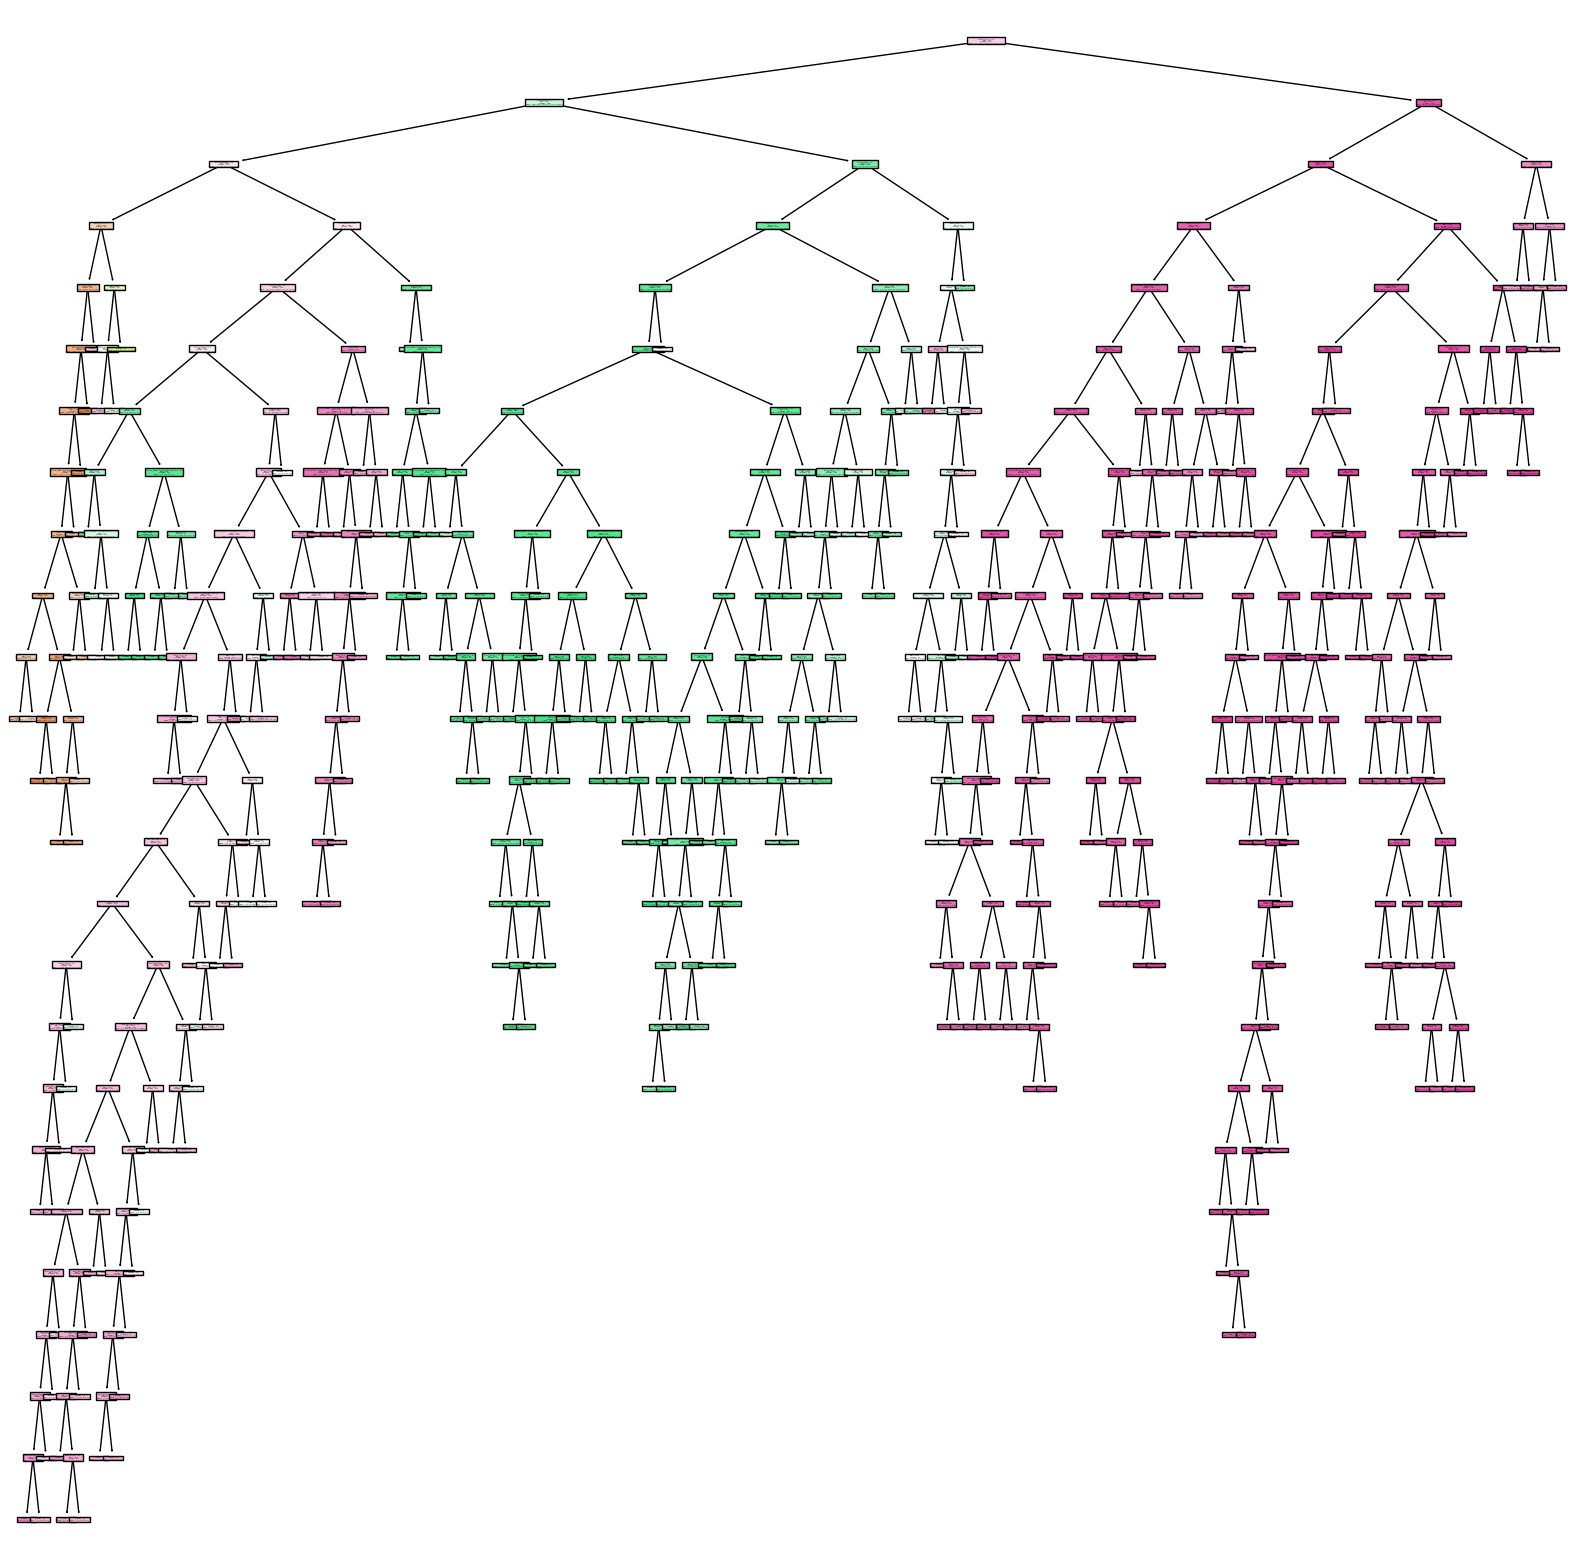

In [54]:
# importing all necessary libraries:
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(min_samples_leaf=500, random_state=42)
model.fit(X_train, Y_train)

from sklearn.metrics import accuracy_score

acc_list = []
leaf_values = list(range(1, 26))

for leaf in leaf_values:
    model = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=42)
    model.fit(X_train, Y_train)
    y_hat = model.predict(X_test)
    acc = accuracy_score(Y_test, y_hat)
    acc_list.append(acc)

best_leaf = leaf_values[acc_list.index(max(acc_list))]
best_acc = max(acc_list)

print(f'Best min_sample_leaf value: {best_leaf} with Accuracy of {best_acc:.3f}')

plt.figure(figsize=(20, 20))
plot_tree(model, filled=True, feature_names=model.feature_names_in_)
plt.show()
